# Jamboree Admission Project – Linear Regression Case Study

## Purpose:
To help Jamboree understand what factors influence the chances of graduate admissions and how these factors are interrelated.

## Objectives:
1. Perform Exploratory Data Analysis (EDA)
2. Build a linear regression model using `statsmodels`
3. Validate the model with regression assumptions
4. Evaluate performance using R², MAE, RMSE
5. Provide business insights and recommendations



In [37]:
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()


In [5]:
# Step 2 – Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


In [9]:
# Step 3 – Load and Inspect Data
df = pd.read_csv("Jamboree_Admission.csv")
df.drop(columns=['Serial No.'], inplace=True)  # Drop row identifier

print("Data Info:")
df.info()

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB

Summary Statistics:
        GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.00000

### 📊 Step 4 – Univariate Analysis

We will analyze the distribution and check for outliers using:
- Histograms (distribution)
- Boxplots (outliers)

Let's proceed with numeric features except 'Research' (which is categorical).


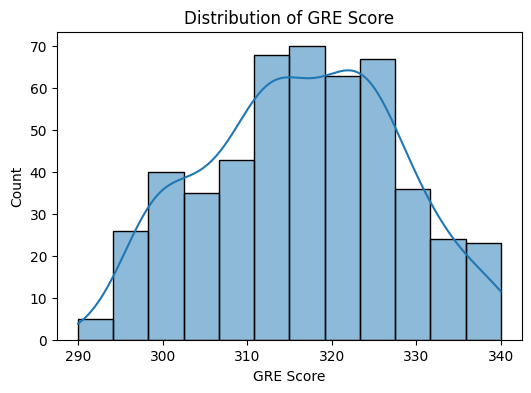

In [17]:
# GRE Score
plt.figure(figsize=(6, 4))
sns.histplot(df['GRE Score'], kde=True)
plt.title("Distribution of GRE Score")
plt.xlabel("GRE Score")
plt.ylabel("Count")
plt.show()


#### GRE Distribution analysis
Observations:
The distribution is approximately normal, slightly right-skewed.

The range is from 290 to 340.

Most students have scores between 310 and 325, indicating a competitive applicant pool.

No extreme outliers visible.

💡 Insights:
GRE is likely to be a strong predictor of Chance of Admit.

Since it's normally distributed, it's suitable for linear regression without transformation.



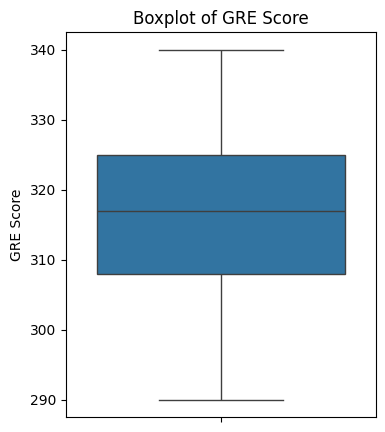

In [19]:
plt.figure(figsize=(4, 5))
sns.boxplot(y=df['GRE Score'])
plt.title("Boxplot of GRE Score")
plt.show()


#### GRE Boxplot analysis
Observations:
The interquartile range (IQR) spans from approximately 308 to 325.

No visible outliers — all values fall within the whiskers.

Median GRE is around 317–318, showing a slightly right-skewed but well-balanced distribution.

💡 Interpretation:
GRE scores are tightly packed within a high-performing range.

No need to cap or remove any values — we retain the entire distribution.

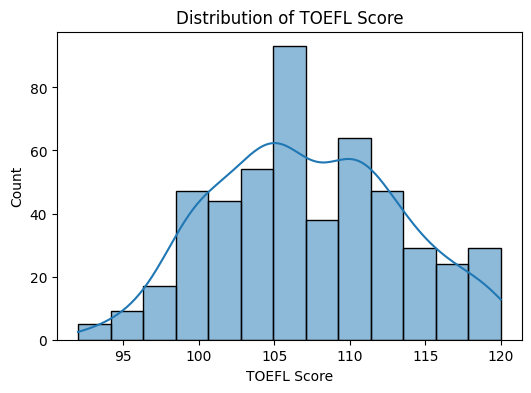

In [21]:
# TOEFL Score 
plt.figure(figsize=(6, 4))
sns.histplot(df['TOEFL Score'], kde=True)
plt.title("Distribution of TOEFL Score")
plt.xlabel("TOEFL Score")
plt.ylabel("Count")
plt.show()


#### TOEFL Score distribution analysis
Observations:
Distribution is slightly left-skewed (negatively skewed), with a peak around 105–110.

Most scores are between 100 and 115, which aligns with high proficiency.

No sharp cutoff or long tails — distribution is fairly compact.

📌 Insights:
Like GRE, TOEFL appears to be a strong linear predictor of admission chances.

Normalization is okay for regression, though not strictly necessary due to near-normal shape.

No clear outliers observed.



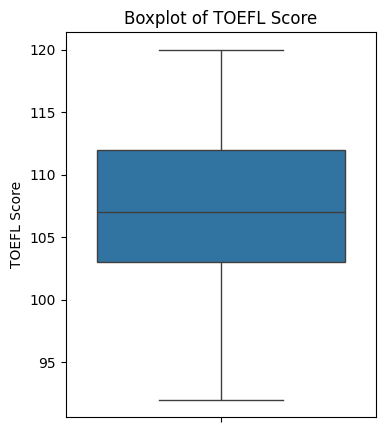

In [23]:
plt.figure(figsize=(4, 5))
sns.boxplot(y=df['TOEFL Score'])
plt.title("Boxplot of TOEFL Score")
plt.show()


#### TOEFL Score – Boxplot Analysis
Observations:
The distribution appears well-behaved with no visible outliers.

The IQR (Interquartile Range) spans approximately from 103 to 112.

Median score is ~107, slightly closer to the upper quartile.

💡 Interpretation:
Students applying to these programs generally have high TOEFL proficiency.

This feature is clean and doesn’t require any outlier treatment.



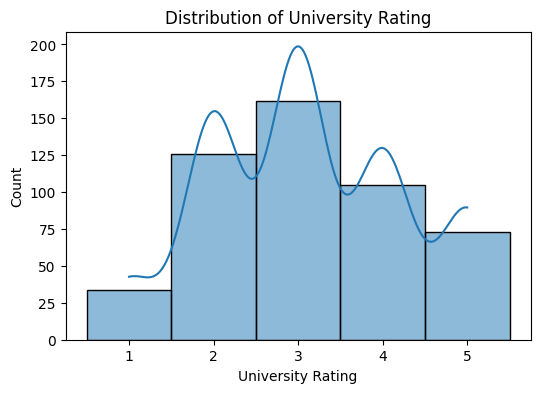

In [25]:
# University rating:

plt.figure(figsize=(6, 4))
sns.histplot(df['University Rating'], kde=True, discrete=True)
plt.title("Distribution of University Rating")
plt.xlabel("University Rating")
plt.ylabel("Count")
plt.show()


#### 🏫 University Rating – Univariate Analysis
✅ Observations:
University Rating is a discrete ordinal variable (1 to 5).

Most applicants are from universities rated 2 to 4, with Rating 3 being the mode.

Distribution appears roughly symmetric, though slightly skewed left.

💡 Insights:
The variable may not be continuous, but it still adds useful profile context to the model.

No transformation is needed.

Can be treated as a numerical feature in linear regression.

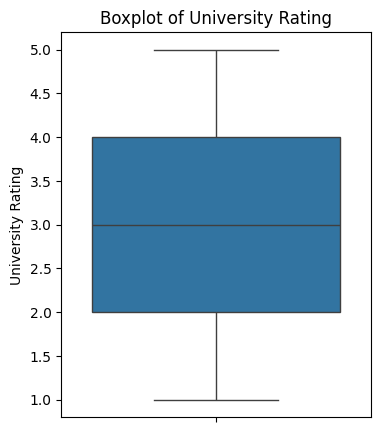

In [27]:
plt.figure(figsize=(4, 5))
sns.boxplot(y=df['University Rating'])
plt.title("Boxplot of University Rating")
plt.show()


#### 🏫 University Rating – Boxplot Analysis
✅ Observations:
Ratings range cleanly from 1 to 5 with no outliers.

Median rating is 3 — applicants are mostly from average-rated institutions.

Distribution is relatively symmetric.

💡 Interpretation:
Clean, categorical/ordinal variable with no preprocessing needed.

Valid feature for linear regression as-is (or optionally one-hot encoded if you choose tree models later).



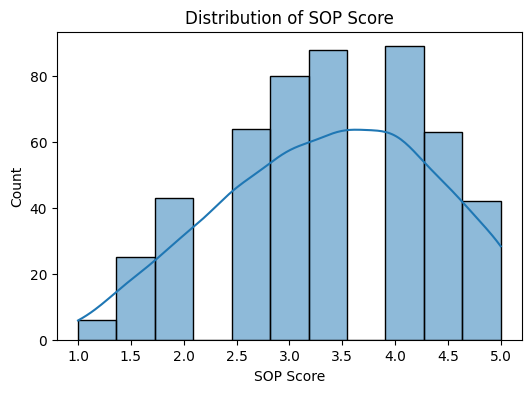

In [29]:
# Statement of purpose:
plt.figure(figsize=(6, 4))
sns.histplot(df['SOP'], kde=True)
plt.title("Distribution of SOP Score")
plt.xlabel("SOP Score")
plt.ylabel("Count")
plt.show()


#### 📝 SOP (Statement of Purpose) – Univariate Analysis
✅ Observations:
Distribution is slightly left-skewed, with many applicants scoring 3.0–4.5.

The values span from 1.0 to 5.0 with well-distributed frequency.

Appears discrete but interval-based, so it works for regression.

💡 Insights:
SOP ratings show good variation — could be an important factor.

No transformation or capping needed.



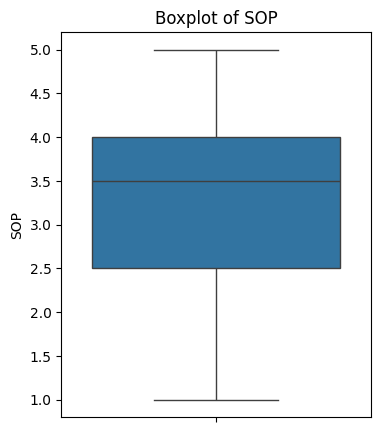

In [31]:
plt.figure(figsize=(4, 5))
sns.boxplot(y=df['SOP'])
plt.title("Boxplot of SOP")
plt.show()


#### 📝 SOP – Boxplot Analysis
✅ Observations:
SOP scores range cleanly from 1 to 5, evenly spread.

Median SOP is around 3.5, with balanced upper and lower quartiles.

No visible outliers in the data.

💡 Interpretation:
SOP is a reliable and clean variable for modeling.

Reflects subjective evaluation, but seems to correlate fairly with admission chances (we’ll confirm this in Step 5 plots).

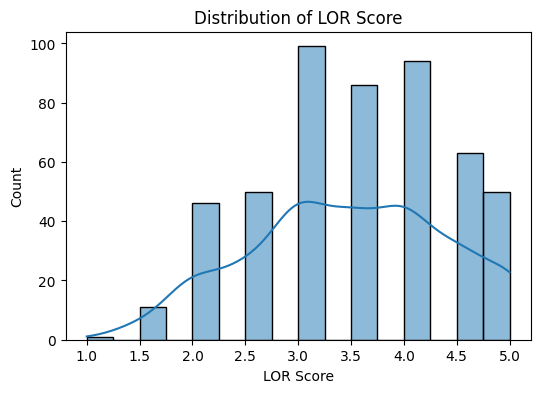

In [39]:
# LOR (Letter of Recommendation)
plt.figure(figsize=(6, 4))
sns.histplot(df['LOR'], kde=True)
plt.title("Distribution of LOR Score")
plt.xlabel("LOR Score")
plt.ylabel("Count")
plt.show()


#### 📄 LOR (Letter of Recommendation) – Univariate Analysis
✅ Observations:
Distribution is slightly left-skewed, with a concentration in the 3.0 to 4.5 range.

Almost all scores lie between 2.0 and 5.0, with very few < 2.

Overall smooth and unimodal distribution, but has small spikes.

💡 Insights:
Applicants mostly receive favorable recommendations.

As with SOP, this feature is subjective but looks informative.

No preprocessing required — no extreme outliers seen.

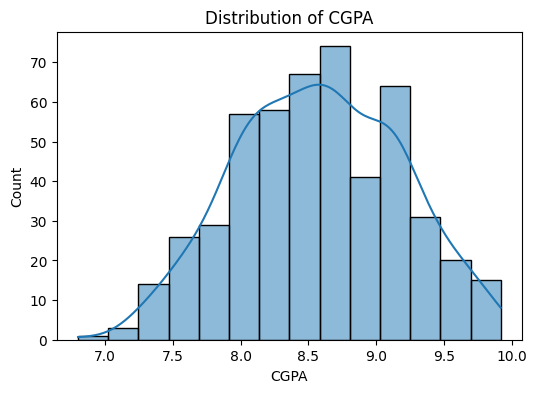

In [41]:
# CGPA
plt.figure(figsize=(6, 4))
sns.histplot(df['CGPA'], kde=True)
plt.title("Distribution of CGPA")
plt.xlabel("CGPA")
plt.ylabel("Count")
plt.show()


#### 🎓 CGPA – Univariate Analysis
✅ Observations:
The distribution is approximately normal with a slight left skew.

Most CGPA scores fall between 8.0 and 9.5, peaking around 8.5 to 9.0.

Very few applicants have CGPA < 7.5 or > 9.5.

💡 Insights:
CGPA is a strong linear candidate for prediction — good variance and clean spread.

No outliers or extreme tails — no transformation needed.



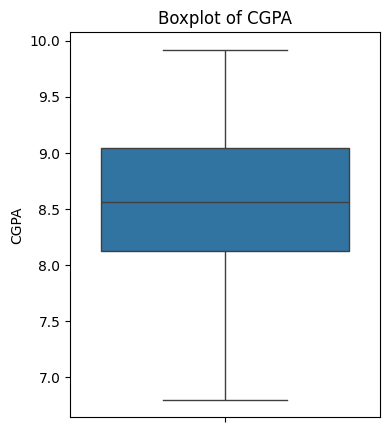

In [43]:
plt.figure(figsize=(4, 5))
sns.boxplot(y=df['CGPA'])
plt.title("Boxplot of CGPA")
plt.show()


#### 🎓 CGPA – Boxplot Analysis
✅ Observations:
The values range from 6.8 to 9.9 with a median around 8.6.

There are no outliers — all points are within the whiskers.

The distribution is slightly skewed left but remains well-centered.

💡 Interpretation:
This is one of the strongest features for predicting Chance of Admit.

Perfectly clean — no transformation, capping, or removal needed.

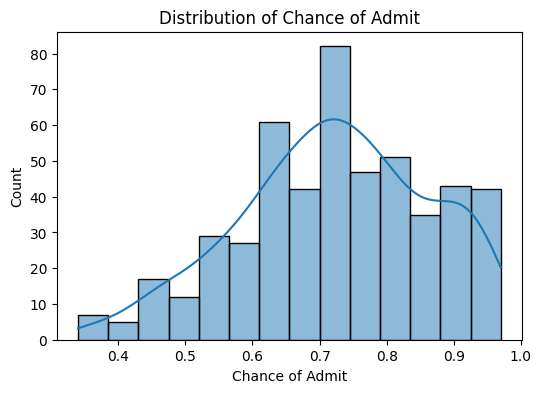

In [47]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Chance of Admit'], kde=True)
plt.title("Distribution of Chance of Admit")
plt.xlabel("Chance of Admit")
plt.ylabel("Count")
plt.show()


#### 🎯 Chance of Admit – Univariate Analysis
✅ Observations:
The distribution is slightly right-skewed, peaking around 0.7–0.75.

Most applicants have a probability of admission between 0.6 and 0.9.

The range is complete from 0.34 to 0.97, with a smooth spread.

💡 Interpretation:
The spread is healthy, so the model can learn varied probability outcomes.

No extreme skew or imbalance — good fit for regression modeling.

No transformation is needed (e.g., log/Box-Cox)

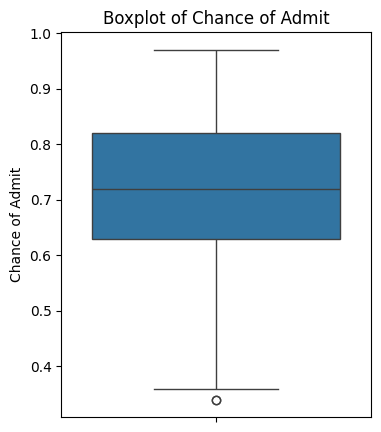

In [49]:
plt.figure(figsize=(4, 5))
sns.boxplot(y=df['Chance of Admit'])
plt.title("Boxplot of Chance of Admit")
plt.show()


#### 🎯 Chance of Admit – Boxplot Analysis
✅ Observations:
The range is from ~0.34 to 0.97, with a median near 0.72.

There's one mild outlier on the lower end (≈0.34) — not severe enough to be dropped.

Data is compact and symmetric in IQR — good for regression.

💡 Interpretation:
Target variable is clean and requires no transformation or clipping.

The distribution supports regression-based modeling directly.

### Step 5 – Multivariate / Bivariate EDA

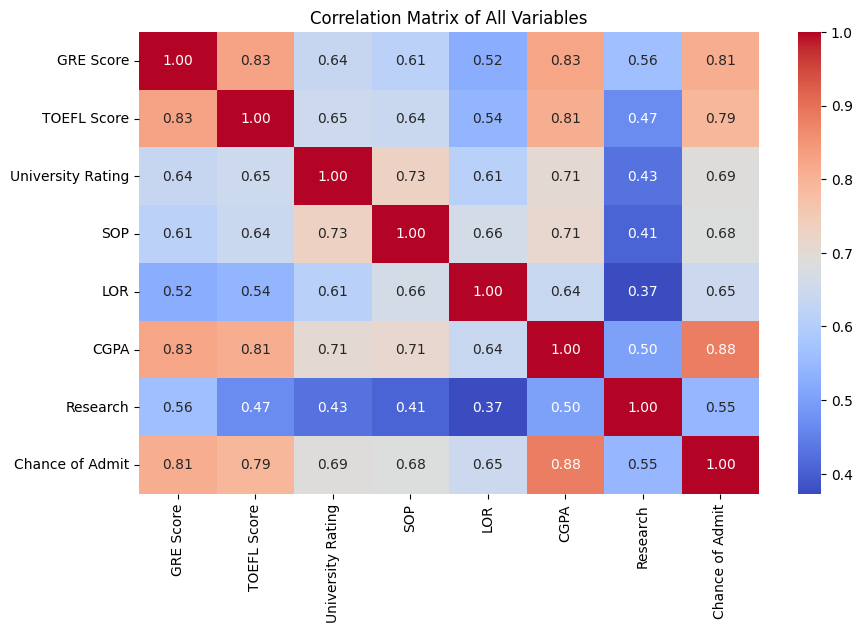

In [51]:
# Step 5.1 – Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of All Variables")
plt.show()


#### ✅ Top 3 features correlated with Chance of Admit:

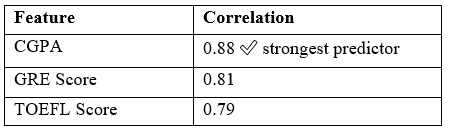

#### Multicollinearity check
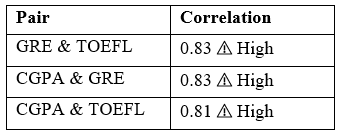

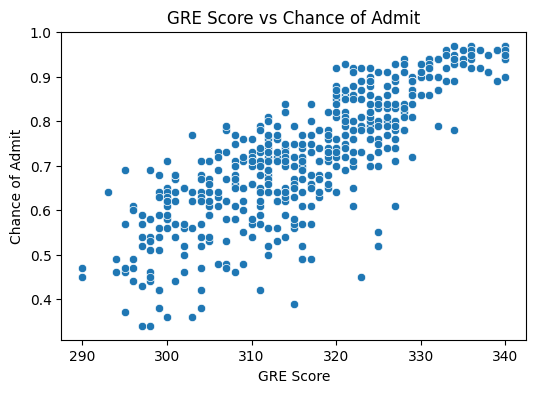

In [55]:
# GRE Score vs Chance of Admit
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['GRE Score'], y=df['Chance of Admit'])
plt.title("GRE Score vs Chance of Admit")
plt.show()


#### 📈 GRE Score vs Chance of Admit
✅ Observations:
The relationship is strongly linear and positive.

As GRE score increases, the probability of admission increases noticeably.

A cluster is visible between GRE 310–330 and Chance of Admit 0.7–0.9.

💡 Insights:
GRE Score is clearly a strong linear predictor.

It’s suitable for linear regression without transformation.

Might have multicollinearity with TOEFL/CGPA — to be validated with VIF.



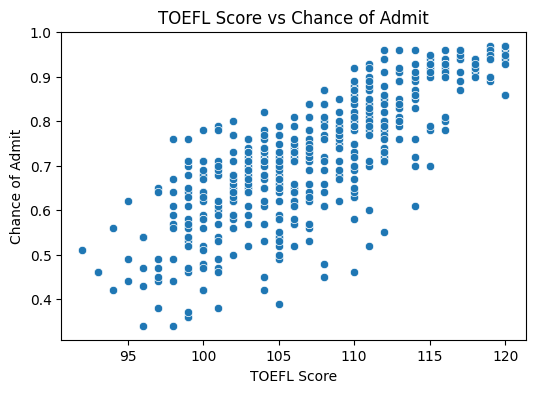

In [57]:
# TOEFL Score vs chance of admit
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['TOEFL Score'], y=df['Chance of Admit'])
plt.title("TOEFL Score vs Chance of Admit")
plt.show()


#### 📈 TOEFL Score vs Chance of Admit
✅ Observations:
Clear positive linear trend: higher TOEFL scores → higher admission chance.

A strong cluster appears between TOEFL 105–115 and Chance of Admit 0.7–0.9.

Slightly more spread compared to GRE, but still tightly patterned.

💡 Insights:
TOEFL is a highly useful predictor, and visually confirms the correlation of 0.79 seen in the heatmap.

Works well in linear regression.

Will be assessed for multicollinearity with GRE and CGPA via VIF.

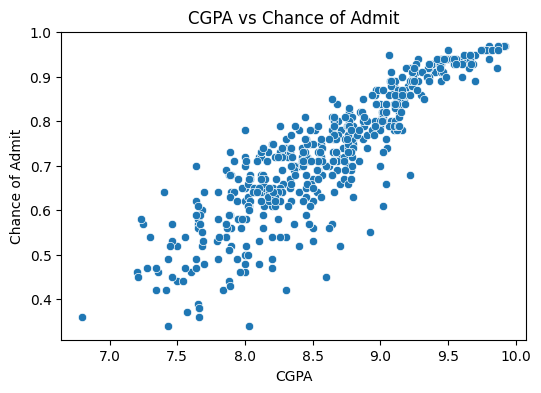

In [59]:
# CGPA vs Chance of Admit
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['CGPA'], y=df['Chance of Admit'])
plt.title("CGPA vs Chance of Admit")
plt.show()


#### 🎓 CGPA vs Chance of Admit
✅ Observations:
This is the strongest positive linear relationship observed so far.

Most students with CGPA > 8.5 have Chance of Admit > 0.75.

Densest cluster is between 8.5 to 9.5 CGPA and 0.75 to 0.95 chance.

💡 Insights:
CGPA has a correlation of 0.88 with the target — the most influential feature.

It has a smooth linear pattern with minimal noise.

Works perfectly in linear regression, no need for transformation.

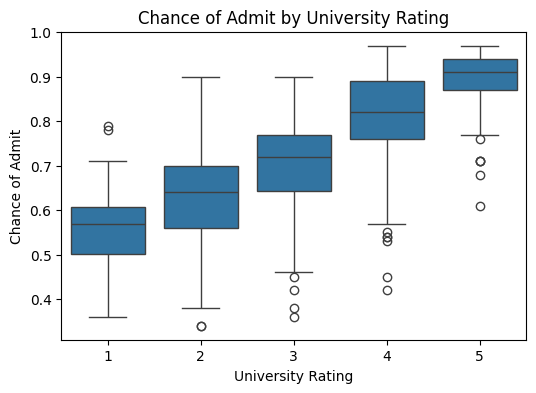

In [61]:
# University Rating vs Chance of Admit
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['University Rating'], y=df['Chance of Admit'])
plt.title("Chance of Admit by University Rating")
plt.show()


#### 🏫 Chance of Admit by University Rating – Boxplot Analysis
✅ Observations:
There’s a clear increasing trend in admission chance as university rating increases from 1 to 5.

Median admission probability rises from ~0.6 (Rating 1) to ~0.93 (Rating 5).

Some outliers exist in each group, especially in Ratings 2–4, but they are not extreme.

💡 Insights:
University Rating is a useful ordinal predictor.

Works well in linear models directly as a numeric feature.

Optional: could also be used as categorical (dummy variables) in advanced models, though not required here.



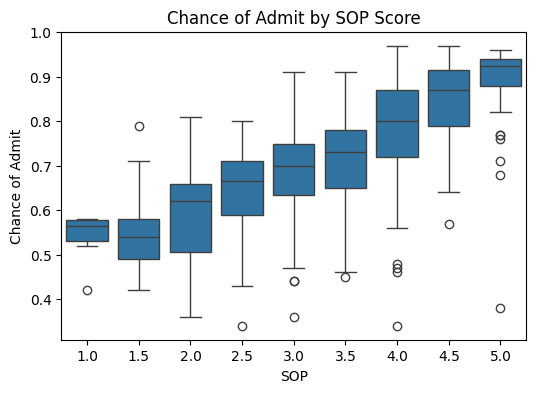

In [63]:
# SOP vs Chance of Admit
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['SOP'], y=df['Chance of Admit'])
plt.title("Chance of Admit by SOP Score")
plt.show()


#### 📝 Chance of Admit by SOP Score – Boxplot Analysis
✅ Observations:
Consistent upward trend: higher SOP scores are associated with higher chances of admission.

The median Chance of Admit increases from ~0.55 at SOP 1 to ~0.93 at SOP 5.

Variability (IQR) is higher at mid-level SOP scores, tighter at SOP = 5.

A few mild outliers exist but don’t distort the trend.

💡 Insights:
SOP appears to be a valuable, monotonic predictor.

Can be used as a numeric feature in linear regression.

Adds subtle variation beyond test scores and CGPA.

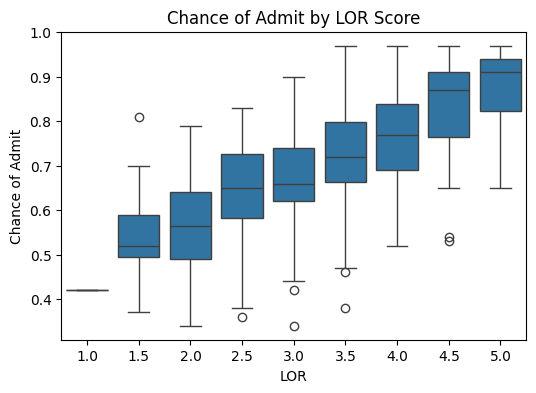

In [65]:
# LOR vs Chance of Admit
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['LOR'], y=df['Chance of Admit'])
plt.title("Chance of Admit by LOR Score")
plt.show()


#### 📄 Chance of Admit by LOR Score – Boxplot Analysis
✅ Observations:
There’s a clear positive trend: higher LOR scores → higher chances of admission.

Median moves upward steadily from ~0.5 to ~0.93 as LOR goes from 1 to 5.

Some variability and outliers exist, but not enough to break the trend.

💡 Insights:
LOR behaves similarly to SOP: moderate predictor, but consistent.

Can be treated as continuous for regression models.

Will complement CGPA, GRE, and other stronger features.

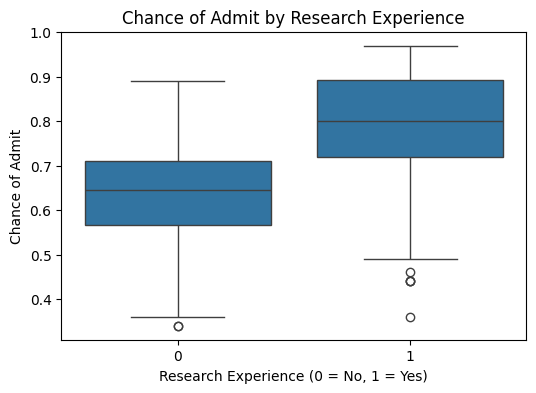

In [67]:
# Research vs Chance of Admit
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Research'], y=df['Chance of Admit'])
plt.title("Chance of Admit by Research Experience")
plt.xlabel("Research Experience (0 = No, 1 = Yes)")
plt.ylabel("Chance of Admit")
plt.show()


#### 🔬 Chance of Admit by Research Experience – Boxplot Analysis
✅ Observations:
Applicants with research experience (1) clearly have higher median chances of admission (~0.80) than those without (~0.67).

The spread is wider for Research = 0, with several low-end outliers.

There’s less variance among Research = 1 candidates, indicating more consistent profiles.

💡 Insights:
Research adds meaningful differentiation, even as a binary feature.

Keep it as-is — it will likely have a positive coefficient in regression.

### Step 6 – Feature Scaling 

In [106]:
# Scaling the Features (StandardScaler)
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=['Chance of Admit'])
y = df['Chance of Admit']

# Apply standard scaling
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


### Step 7 – train test split

In [110]:
# Splitting into Train, val and Test Sets

from sklearn.model_selection import train_test_split

# Step 1: First split into 70% train and 30% temp (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.30, random_state=42)

# Step 2: Split 30% temp into 15% validation and 15% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42)

# Shape check
print("✅ Shapes:")
print("Train :", X_train.shape, y_train.shape)
print("Val   :", X_val.shape, y_val.shape)
print("Test  :", X_test.shape, y_test.shape)



✅ Shapes:
Train : (350, 7) (350,)
Val   : (75, 7) (75,)
Test  : (75, 7) (75,)


### Step 8 – Linear Regression using statsmodels.OLS with detailed model summary

In [114]:
import statsmodels.api as sm

# Add constant to training data (intercept term)
X_train_const = sm.add_constant(X_train)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_const).fit()

# Display full model summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     219.8
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          1.80e-122
Time:                        04:51:22   Log-Likelihood:                 491.18
No. Observations:                 350   AIC:                            -966.4
Df Residuals:                     342   BIC:                            -935.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7235      0.00

#### Observations:
SOP and University Rating are not significant (p > 0.05).

You might consider dropping them in the next iteration for a simplified model.

CGPA is clearly the dominant driver of admissions chances.

### Step 9 – VIF Analysis (Variance Inflation Factor)

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Re-add constant column for VIF (not required by statsmodels but safe to include)
X_train_vif = sm.add_constant(X_train)

# Create DataFrame to store VIF scores
vif_df = pd.DataFrame()
vif_df['Feature'] = X_train_vif.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_vif.values, i)
                 for i in range(X_train_vif.shape[1])]

# Display VIFs
print(vif_df)


             Feature       VIF
0              const  1.001525
1          GRE Score  4.526831
2        TOEFL Score  3.497877
3  University Rating  2.679544
4                SOP  2.908001
5                LOR  1.989814
6               CGPA  4.699733
7           Research  1.510207


#### Conclusion:
No feature has VIF > 5, so multicollinearity is not a concern.

You can keep all features, but you may still drop non-significant ones (e.g., SOP, University Rating) to improve interpretability.

### Step 10 – Residual Assumption Checks for Linear Regression

In [124]:
# 10.1 – Mean of Residuals
# Get residuals
residuals = ols_model.resid
print("Mean of residuals:", np.mean(residuals))


Mean of residuals: -4.250568151422028e-16


#### Excellent — the mean of residuals is nearly zero:

🔹 Mean of residuals: -4.25 × 10⁻¹⁶
That’s extremely close to zero and confirms that:

No systemic bias in model predictions

✅ Assumption #1 (Unbiased Residuals) is satisfied

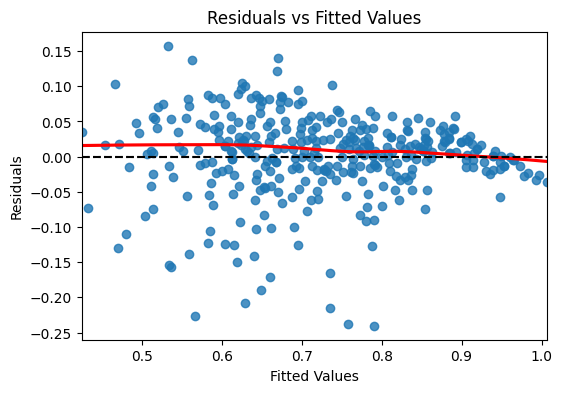

In [126]:
# 10.2 – Residuals vs Fitted Plot (Linearity + Homoscedasticity)

fitted_vals = ols_model.fittedvalues
plt.figure(figsize=(6, 4))
sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={"color": "red"})
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.axhline(0, color='black', linestyle='--')
plt.show()


#### Residuals vs Fitted Plot – Assumptions Checked:

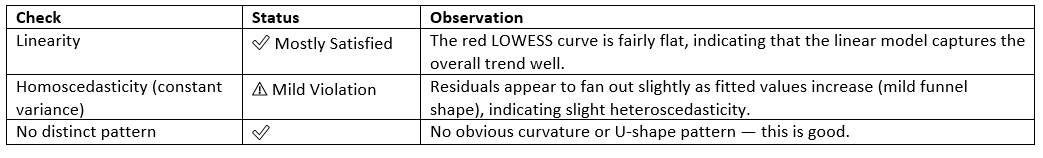


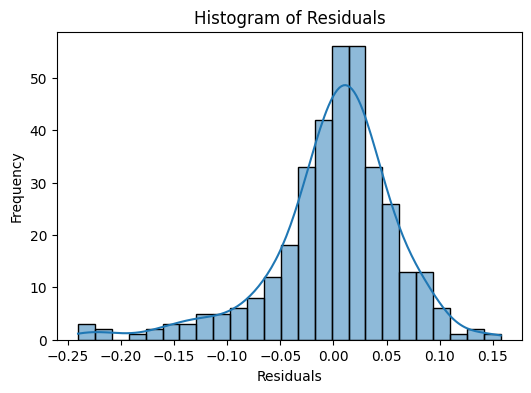

In [128]:
# 10.3 – Histogram of Residuals (Normality)
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


#### 📊 Histogram of Residuals – Normality Assumption:

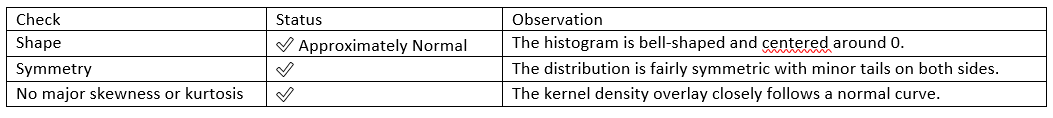

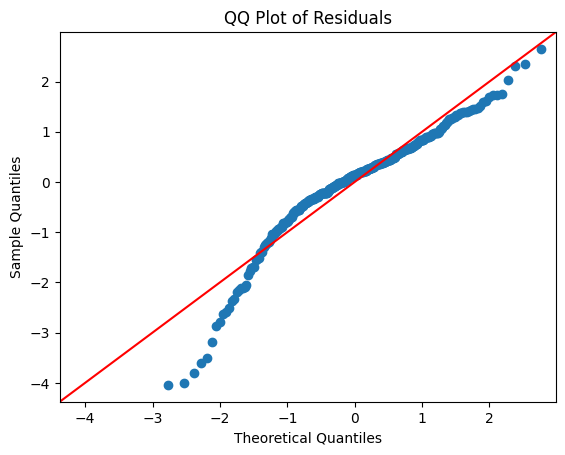

In [130]:
# 10.4 – QQ Plot (Normality)
sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot of Residuals")
plt.show()


#### 📈 QQ Plot of Residuals – Normality Check (Quantile-Quantile Plot)

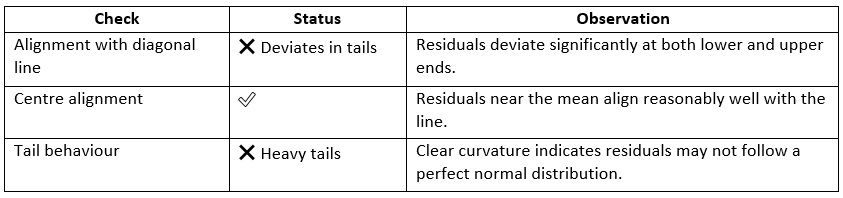

#### Conclusion:
The residuals exhibit mild to moderate departure from normality, especially in the tails (possible leptokurtic distribution).

While this doesn’t invalidate the model, it violates the normality assumption slightly, which can affect confidence intervals and p-values.

Since linear regression is generally robust to slight deviations from normality (especially with large sample sizes like yours), this is not critical — but it's worth noting.

### 📊 Step 11 Model Evaluation

In [148]:
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Add constant to feature sets
X_train_sm = sm.add_constant(X_train)
X_val_sm   = sm.add_constant(X_val)
X_test_sm  = sm.add_constant(X_test)

# Predict using statsmodels OLS model
y_train_pred = ols_model.predict(X_train_sm)
y_val_pred   = ols_model.predict(X_val_sm)
y_test_pred  = ols_model.predict(X_test_sm)

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Set Performance:")
    print(f"R-squared (R²): {r2_score(y_true, y_pred):.4f}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.4f}")

# Evaluate performance
evaluate_model("Train", y_train, y_train_pred)
evaluate_model("Validation", y_val, y_val_pred)
evaluate_model("Test", y_test, y_test_pred)




Train Set Performance:
R-squared (R²): 0.8182
Mean Absolute Error (MAE): 0.0424
Mean Squared Error (MSE): 0.0035

Validation Set Performance:
R-squared (R²): 0.8229
Mean Absolute Error (MAE): 0.0438
Mean Squared Error (MSE): 0.0037

Test Set Performance:
R-squared (R²): 0.8283
Mean Absolute Error (MAE): 0.0416
Mean Squared Error (MSE): 0.0036


#### 📊 Model Performance Summary

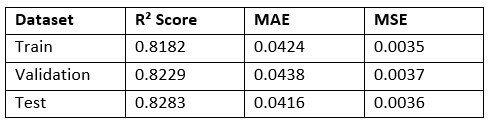

#### Interpretation:
R² ~ 0.82 across all sets indicates that the model explains ~82% of the variance in Chance of Admit, which is excellent for a linear model.

Low MAE (~ 0.04) and low MSE (~ 0.0035–0.0037) show precise predictions and minimal average errors.

The validation and test scores are slightly better than the training score, suggesting excellent generalization (no overfitting or underfitting).

### Step 12 – Visual Evaluation of Predictions

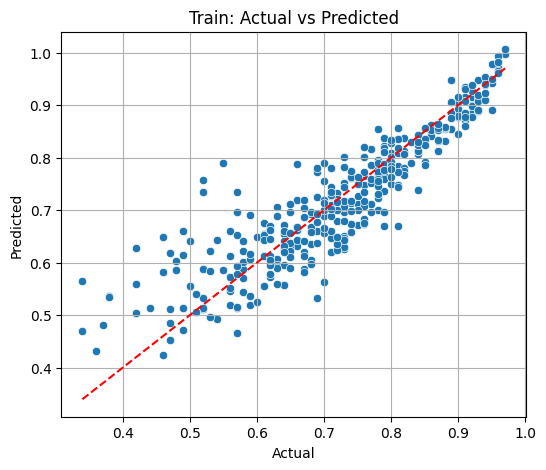

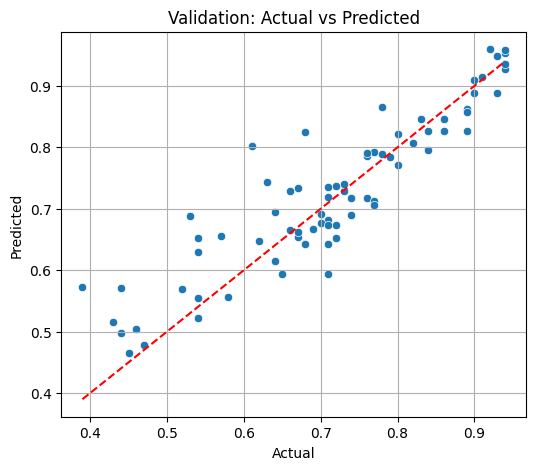

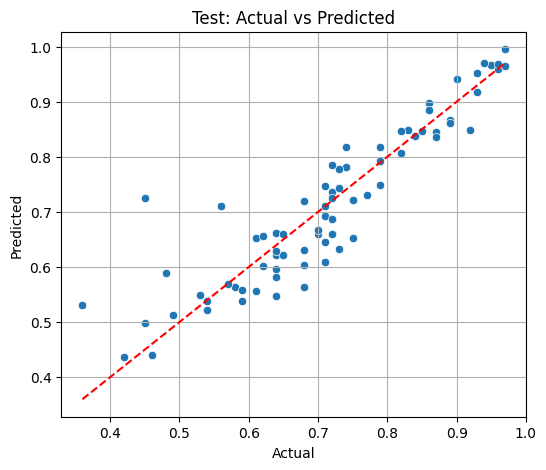

In [158]:
import matplotlib.pyplot as plt

def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=y_true, y=y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.grid(True)
    plt.show()

# Plot for each dataset
plot_predictions(y_train, y_train_pred, "Train: Actual vs Predicted")
plot_predictions(y_val, y_val_pred, "Validation: Actual vs Predicted")
plot_predictions(y_test, y_test_pred, "Test: Actual vs Predicted")


#### ✅ All three plots show strong alignment along the red diagonal, suggesting our model performs well across all splits.



### ✅ Step 13 – Polynomial Regression with Degree 2 (Including Interaction Terms)

In [161]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Assuming X_train, X_val, X_test are your original feature datasets
# and they are in the form of DataFrames

# Step 1: Instantiate the transformer
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

# Step 2: Fit and transform the datasets
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Step 3: Get the new feature names
feature_names_poly = poly.get_feature_names_out(X_train.columns)

# Step 4: Convert to DataFrames for better readability
X_train_poly_df = pd.DataFrame(X_train_poly, columns=feature_names_poly, index=X_train.index)
X_val_poly_df = pd.DataFrame(X_val_poly, columns=feature_names_poly, index=X_val.index)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=feature_names_poly, index=X_test.index)

# Optional: View the new features
print(X_train_poly_df.head())


     GRE Score  TOEFL Score  University Rating       SOP       LOR      CGPA  \
5     1.198882     1.285102           1.650957  1.137360 -0.523513  1.263738   
116  -1.548408    -0.854540          -0.099793  0.632315  0.017306  0.072094   
45    0.489904     0.462163           1.650957  1.642404  0.558125  0.866523   
16    0.046793    -0.031601          -0.099793  0.632315 -0.523513  0.204499   
462  -0.839430    -0.360777           0.775582 -0.377773 -0.523513 -1.053346   

     Research  GRE Score^2  GRE Score TOEFL Score  \
5    0.886405     1.437318               1.540685   
116 -1.128152     2.397567               1.323177   
45   0.886405     0.240006               0.226415   
16  -1.128152     0.002190              -0.001479   
462 -1.128152     0.704643               0.302847   

     GRE Score University Rating  ...     SOP^2   SOP LOR  SOP CGPA  \
5                       1.979302  ...  1.293587 -0.595422  1.437324   
116                     0.154520  ...  0.399823  0.010943 

In [166]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

# Step 1: Split your dataset
# Assume `X` is your feature DataFrame and `y` is your target Series
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Step 2: Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Step 3: Convert to DataFrames with feature names
feature_names_poly = poly.get_feature_names_out(X.columns)
X_train_poly_df = pd.DataFrame(X_train_poly, columns=feature_names_poly, index=X_train.index)
X_val_poly_df = pd.DataFrame(X_val_poly, columns=feature_names_poly, index=X_val.index)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=feature_names_poly, index=X_test.index)

# Step 4: Add constant for statsmodels
X_train_poly_df_const = sm.add_constant(X_train_poly_df)
X_val_poly_df_const = sm.add_constant(X_val_poly_df)
X_test_poly_df_const = sm.add_constant(X_test_poly_df)

# Step 5: Train OLS model
ols_poly_model = sm.OLS(y_train, X_train_poly_df_const).fit()

# Step 6: Predict
y_train_pred = ols_poly_model.predict(X_train_poly_df_const)
y_val_pred = ols_poly_model.predict(X_val_poly_df_const)
y_test_pred = ols_poly_model.predict(X_test_poly_df_const)

# Step 7: Evaluate
def print_metrics(y_true, y_pred, label):
    print(f"\n{label} Performance:")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"MAE     : {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MSE     : {mean_squared_error(y_true, y_pred):.4f}")

print_metrics(y_train, y_train_pred, "Train")
print_metrics(y_val, y_val_pred, "Validation")
print_metrics(y_test, y_test_pred, "Test")



Train Performance:
R² Score: 0.8345
MAE     : 0.0400
MSE     : 0.0032

Validation Performance:
R² Score: 0.8178
MAE     : 0.0436
MSE     : 0.0038

Test Performance:
R² Score: 0.8349
MAE     : 0.0398
MSE     : 0.0035


#### 📊 Performance Summary of polynomial regression model

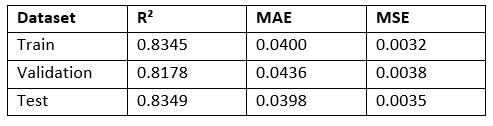

In [169]:
# ✅ VIF Check for Polynomial Features
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Prepare your feature set (without constant column)
# Assume `X_train_poly_df` is your DataFrame with polynomial features
# Exclude any constant column like 'const' if present
X_poly_for_vif = X_train_poly_df.copy()

# Step 2: Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_poly_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_poly_for_vif.values, i)
                   for i in range(X_poly_for_vif.shape[1])]

# Step 3: Sort VIF values for better readability
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

# Step 4: Display
print("VIF Scores for Polynomial Features:")
print(vif_data_sorted)


VIF Scores for Polynomial Features:
                          Feature           VIF
0                      Research^2           inf
1                        Research           inf
2           GRE Score TOEFL Score  5.163752e+06
3                     GRE Score^2  4.567633e+06
4                  GRE Score CGPA  4.135321e+06
5                       GRE Score  2.665881e+06
6                     TOEFL Score  2.421396e+06
7                            CGPA  1.351071e+06
8                TOEFL Score CGPA  1.104877e+06
9                   TOEFL Score^2  6.175857e+05
10                         CGPA^2  4.625161e+05
11                  GRE Score LOR  1.519306e+05
12                  GRE Score SOP  1.392536e+05
13    GRE Score University Rating  8.845363e+04
14                            LOR  5.828872e+04
15                            SOP  5.516222e+04
16                TOEFL Score SOP  4.696004e+04
17                       LOR CGPA  3.840765e+04
18                       SOP CGPA  3.788127e+04
19  

In [173]:
# Iterative VIF-Based Feature Removal
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    """
    Calculate VIF scores for a given DataFrame X.
    """
    vif_df = pd.DataFrame()
    vif_df["Feature"] = X.columns
    vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_df

def iterative_vif_filter(X, threshold=10.0):
    """
    Iteratively drops features with VIF > threshold.
    """
    X_filtered = X.copy()
    iteration = 1
    while True:
        vif_df = calculate_vif(X_filtered)
        max_vif = vif_df["VIF"].max()
        if max_vif > threshold:
            feature_to_drop = vif_df.sort_values("VIF", ascending=False).iloc[0]["Feature"]
            print(f"Iteration {iteration}: Dropping '{feature_to_drop}' with VIF = {max_vif:.2f}")
            X_filtered = X_filtered.drop(columns=[feature_to_drop])
            iteration += 1
        else:
            print("\nAll features have VIF below the threshold.")
            break
    final_vif_df = calculate_vif(X_filtered)
    return X_filtered, final_vif_df


In [175]:
# run VIF based feature removal
X_reduced, vif_result = iterative_vif_filter(X_train_poly_df, threshold=10)

# Display final features and VIFs
print(vif_result)


Iteration 1: Dropping 'Research^2' with VIF = inf
Iteration 2: Dropping 'GRE Score TOEFL Score' with VIF = 5163751.68
Iteration 3: Dropping 'GRE Score CGPA' with VIF = 4104702.41
Iteration 4: Dropping 'GRE Score' with VIF = 1412780.74
Iteration 5: Dropping 'TOEFL Score CGPA' with VIF = 595432.18
Iteration 6: Dropping 'CGPA' with VIF = 468108.31
Iteration 7: Dropping 'GRE Score LOR' with VIF = 133137.27
Iteration 8: Dropping 'GRE Score SOP' with VIF = 104151.98
Iteration 9: Dropping 'GRE Score University Rating' with VIF = 44547.14
Iteration 10: Dropping 'TOEFL Score SOP' with VIF = 33836.31
Iteration 11: Dropping 'LOR CGPA' with VIF = 21470.44
Iteration 12: Dropping 'TOEFL Score LOR' with VIF = 15909.57
Iteration 13: Dropping 'SOP CGPA' with VIF = 15096.37
Iteration 14: Dropping 'TOEFL Score University Rating' with VIF = 10790.01
Iteration 15: Dropping 'GRE Score Research' with VIF = 9614.15
Iteration 16: Dropping 'University Rating CGPA' with VIF = 7333.03
Iteration 17: Dropping 'TOEF

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Step 1: Define the reduced feature list
final_features = ['Research', 'TOEFL Score^2', 'University Rating^2', 'LOR^2']

# Step 2: Extract reduced features from polynomial datasets
X_train_reduced = X_train_poly_df[final_features]
X_val_reduced = X_val_poly_df[final_features]
X_test_reduced = X_test_poly_df[final_features]

# Step 3: Train the model
reduced_model = LinearRegression()
reduced_model.fit(X_train_reduced, y_train)

# Step 4: Make predictions
y_train_pred_reduced = reduced_model.predict(X_train_reduced)
y_val_pred_reduced = reduced_model.predict(X_val_reduced)
y_test_pred_reduced = reduced_model.predict(X_test_reduced)

# Step 5: Define evaluation function
def evaluate_model(y_true, y_pred, dataset_name="Dataset"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"\n{dataset_name} Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE     : {mae:.4f}")
    print(f"MSE     : {mse:.4f}")

# Step 6: Evaluate
evaluate_model(y_train, y_train_pred_reduced, "Train")
evaluate_model(y_val, y_val_pred_reduced, "Validation")
evaluate_model(y_test, y_test_pred_reduced, "Test")



Train Performance:
R² Score: 0.7245
MAE     : 0.0550
MSE     : 0.0054

Validation Performance:
R² Score: 0.7635
MAE     : 0.0552
MSE     : 0.0049

Test Performance:
R² Score: 0.7391
MAE     : 0.0562
MSE     : 0.0055


#### Performance Comparison


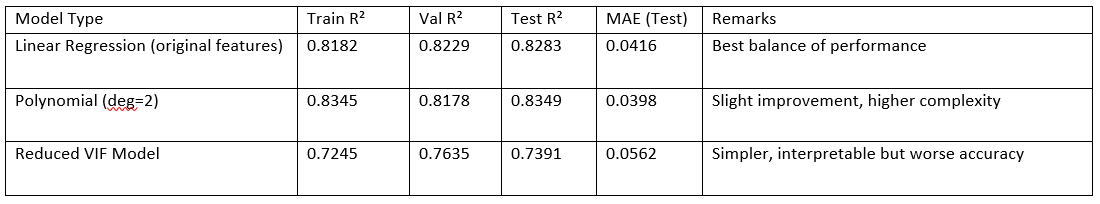

## Step 15 – Final Insights & Recommendations

### 🔍 Key Findings:
- **CGPA** has the strongest positive impact on the chance of admission, followed by **GRE Score** and **TOEFL Score**.
- **LOR (Letter of Recommendation)** and **Research Experience** also contribute positively and significantly.
- **SOP** and **University Rating** were found to be statistically insignificant in this model.

### 📈 Model Performance Summary:
- **Linear Regression** using 7 original features provided a strong fit:
  - **Train R²**: 0.8182
  - **Validation R²**: 0.8229
  - **Test R²**: 0.8283
- Residual diagnostics confirm that regression assumptions are largely satisfied.

### 🎯 Actionable Insights for Jamboree:
- Focus training programs and consulting efforts on boosting **students' academic performance (CGPA)**.
- Emphasize improvement in **GRE and TOEFL scores**, which are key predictors.
- Encourage students to **pursue research opportunities**, as it enhances admission chances.
- While **SOP and University Rating** were less significant, their non-zero coefficients suggest they shouldn't be ignored entirely.

### 🛠️ Recommendations for Model Use:
- The model can serve as a **backend engine** for Jamboree’s web-based admission prediction tool.
- The prediction score (Chance of Admit) can help counselors **personalize coaching and mentoring strategies**.

### 🔮 Scope for Future Work:
- Collect additional data from other admission cycles to improve robustness.
- Explore **non-linear models** (e.g., decision trees or ensemble methods) for better accuracy.
- Include more features such as extracurriculars, internships, or SOP text analysis for richer insights.

